In [1]:
import pandas as pd
from ETL import ETL
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('dataset/2012.csv')

In [3]:
df = ETL(df)

c:\Users\dswal\Desktop\Data-Science-Project\ETL.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'FL_MON'] = df['FL_DATE'].apply(lambda x: x.month)
c:\Users\dswal\Desktop\Data-Science-Project\ETL.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'FL_DAY'] = df['FL_DATE'].apply(lambda x: x.day)
c:\Users\dswal\Desktop\Data-Science-Project\ETL.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

# Clustering

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Creiamo un intervallo di possibili valori per K (ad esempio da 1 a 10)
wcss = []  # Lista per memorizzare l'inertia per ogni K
for k in range(1, 11):  # Proviamo K da 1 a 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

# Visualizziamo il grafico dell'Elbow
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-', color='b')
plt.title('Metodo dell\'Elbow')
plt.xlabel('Numero di Cluster')
plt.ylabel('Inertia (WCSS)')
plt.show()


C:\Users\dswal\AppData\Local\Temp\ipykernel_27540\2757782394.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.fillna(0, inplace=True)
C:\Users\dswal\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


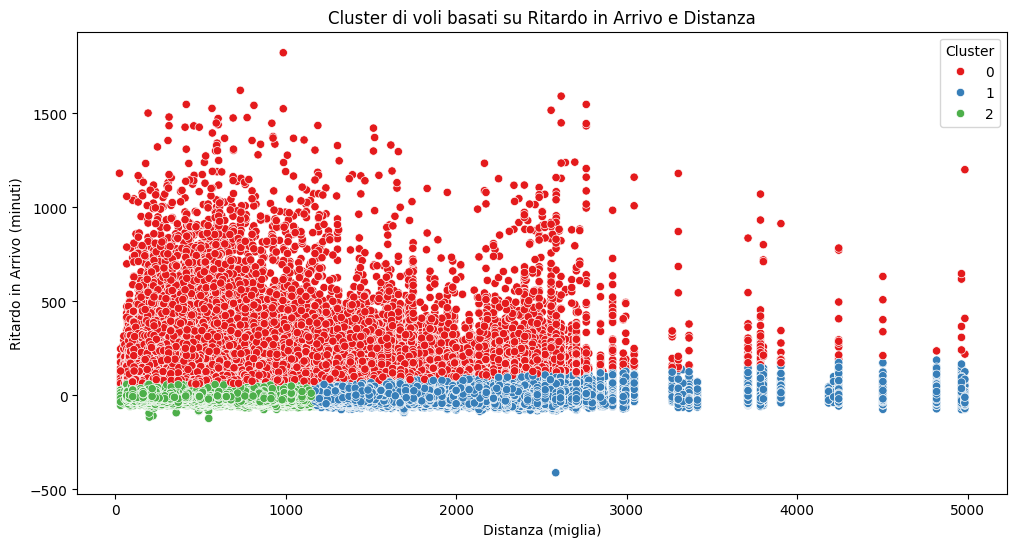

In [ ]:
# Selezioniamo le colonne di interesse
data = df[['ARR_DELAY', 'DISTANCE']]

# Gestire eventuali valori nulli
data.fillna(0, inplace=True)

# Standardizzazione dei dati per evitare che le variabili con valori più alti influenzino il clustering
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(data_scaled)

plt.figure(figsize=(12, 6))
sns.scatterplot(x='DISTANCE', y='ARR_DELAY', hue='Cluster', data=df, palette='Set1')
plt.title('Cluster di voli basati su Ritardo in Arrivo e Distanza')
plt.xlabel('Distanza (miglia)')
plt.ylabel('Ritardo in Arrivo (minuti)')
plt.legend(title='Cluster')
plt.show()


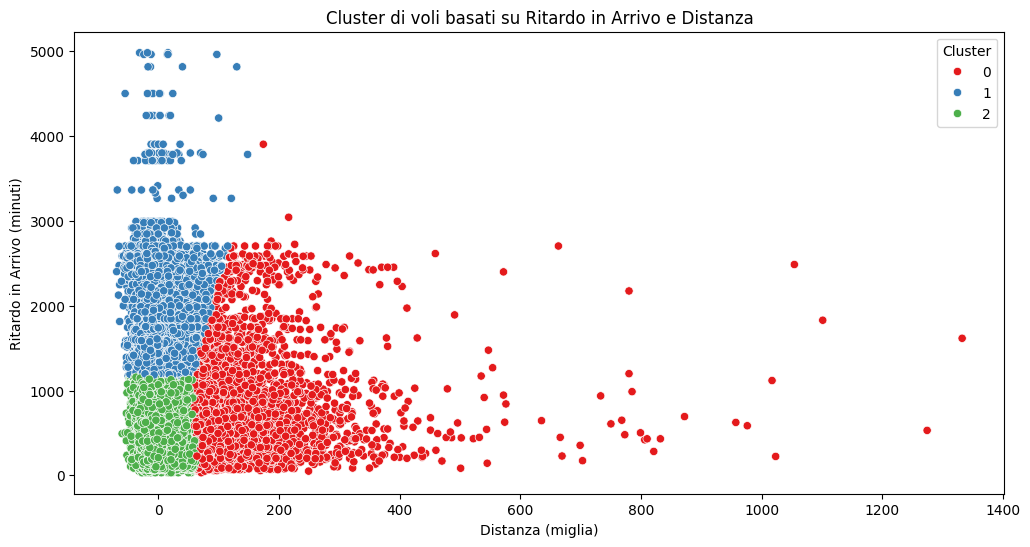

In [9]:
sample_df = df.sample(n=100000, random_state=42) 
plt.figure(figsize=(12, 6))
sns.scatterplot(x='ARR_DELAY', y='DISTANCE', hue='Cluster', data=sample_df, palette='Set1')
plt.title('Cluster di voli basati su Ritardo in Arrivo e Distanza')
plt.xlabel('Distanza (miglia)')
plt.ylabel('Ritardo in Arrivo (minuti)')
plt.legend(title='Cluster')
plt.show()
